In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
%%bash
ls

Authorization.py
Data_Analysis.ipynb
Flask
Machine_Learning.ipynb
README.md
__pycache__
edm_main.py
lofi_main.py
package.json
spotify_EDMvsLoFi_new.sqbpro
spotify_EDMvsLoFi_new.sqlite
track_extraction.py


In [3]:
#Create a db connection
con = sqlite3.connect('spotify_EDMvsLoFi_new.sqlite')
cursor = con.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('EDM_music',), ('LOFI_music',)]


In [5]:
#Check columns of the table
def table_columns(db, table_name):
    curs = db.cursor()
    sql = "select * from %s where 1=0;" % table_name
    curs.execute(sql)
    return [d[0] for d in curs.description]

In [6]:
#checking columns in each table
table_columns(con, 'lofi_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [7]:
#checking columns in each table
table_columns(con, 'edm_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [8]:
#Reading columns into a pandas Dataframe
df_lofi = pd.read_sql_query("SELECT * FROM lofi_music", con)
df_lofi.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Tell Me Why I'm Waiting,Timmies,Passion & Confusion,lo-fi chill,2017-09-21,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,Eternal Youth,RŮDE,Eternal Youth,japanese chillhop,2017-08-07,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,Call me,90sFlav,Collection,lo-fi beats,2018-02-09,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,I'll Keep You Safe,sagun,I'll Keep You Safe,lo-fi beats,2017-10-06,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,i'm closing my eyes,potsu,i'm closing my eyes,japanese chillhop,2017-05-17,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [9]:
#Reading columns into a pandas Dataframe
df_edm = pd.read_sql_query("SELECT * FROM edm_music", con)
df_edm.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ten Feet Tall,Afrojack,Forget The World (Deluxe),big room,2014-01-01,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,Feel Good (feat. Daya),Gryffin,Feel Good (feat. Daya),dance pop,2017-03-03,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,Narco,Blasterjaxx,Narco,big room,2017-11-13,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,Secrets,Tiësto,"Club Life, Vol. 4 - New York City",big room,2015-05-18,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,Forbidden Voices,Martin Garrix,Forbidden Voices,dance pop,2015-02-23,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [32]:
#Evaluating only the audio features
df_edm_eval = df_edm[['track_name','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_edm_eval.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ten Feet Tall,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,Feel Good (feat. Daya),0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,Narco,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,Secrets,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,Forbidden Voices,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [33]:
#Evaluating only the audio features
df_lofi_eval = df_lofi[['track_name','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_lofi_eval.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Tell Me Why I'm Waiting,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,Eternal Youth,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,Call me,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,I'll Keep You Safe,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,i'm closing my eyes,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [34]:
df_lofi_eval['EDM'] = np.zeros((len(df_lofi_eval), 1), dtype=int)
df_lofi_eval.head()

/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_50500/1403566616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lofi_eval['EDM'] = np.zeros((len(df_lofi_eval), 1), dtype=int)


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM
0,Tell Me Why I'm Waiting,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891,0
1,Eternal Youth,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766,0
2,Call me,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250,0
3,I'll Keep You Safe,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876,0
4,i'm closing my eyes,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302,0


In [36]:
df_edm_eval['EDM'] = np.ones((len(df_edm_eval), 1), dtype=int)
df_edm_eval.head()

/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_50500/2762893716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edm_eval['EDM'] = np.ones((len(df_edm_eval), 1), dtype=int)


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM
0,Ten Feet Tall,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149,1
1,Feel Good (feat. Daya),0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156,1
2,Narco,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635,1
3,Secrets,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947,1
4,Forbidden Voices,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635,1


In [37]:
df_edm_eval.shape

(149, 14)

In [38]:
df_lofi_eval.shape

(1071, 14)

In [39]:
songs = df_edm_eval.append(df_lofi_eval,ignore_index=False)
songs.head()

/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_50500/14304339.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  songs = df_edm_eval.append(df_lofi_eval,ignore_index=False)


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM
0,Ten Feet Tall,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149,1
1,Feel Good (feat. Daya),0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156,1
2,Narco,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635,1
3,Secrets,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947,1
4,Forbidden Voices,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635,1


In [40]:
songs.shape

(1220, 14)

In [41]:
songs = songs.drop_duplicates()
songs.shape

(1220, 14)

In [42]:
songs.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM
0,Ten Feet Tall,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149,1
1,Feel Good (feat. Daya),0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156,1
2,Narco,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635,1
3,Secrets,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947,1
4,Forbidden Voices,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635,1


In [43]:
prediction = songs.drop(['track_name'], axis=1)

In [44]:
prediction.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM
0,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149,1
1,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156,1
2,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635,1
3,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947,1
4,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635,1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

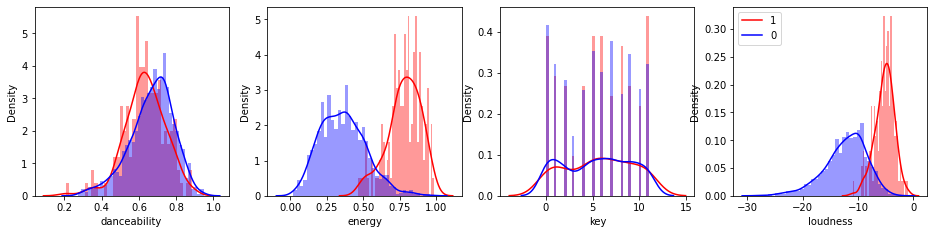

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['EDM']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['EDM']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['EDM']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['EDM']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

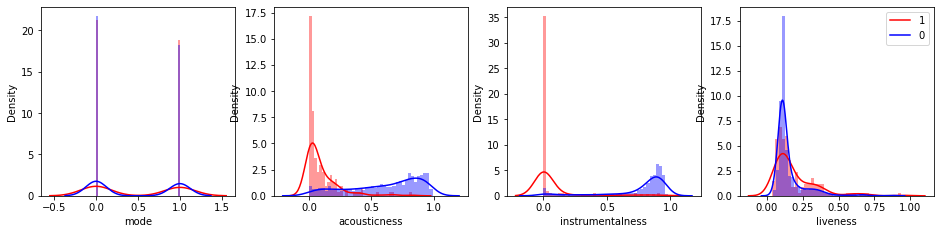

In [25]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['EDM']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['EDM']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['EDM']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['EDM']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Thina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

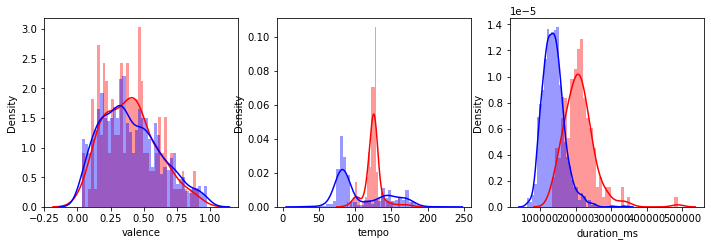

In [28]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['EDM']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['EDM']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['EDM']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['EDM']==0]['duration_ms'], color='blue', bins=40)

## Building Machine Learning Model


#### Logistic Regression

In [45]:
#Below four new dataframes are created for building the classifier.
X_train = prediction.drop('EDM', axis=1)
X_test = songs.drop(['EDM','track_name'], axis=1)
y_train = prediction['EDM']
y_test = songs['EDM']

In [46]:
X_train.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [47]:
X_test.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [48]:
y_train.tail()


1066    0
1067    0
1068    0
1069    0
1070    0
Name: EDM, dtype: int64

In [49]:
y_test.head()


0    1
1    1
2    1
3    1
4    1
Name: EDM, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [55]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[1055   16]
 [  23  126]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1071
           1       0.89      0.85      0.87       149

    accuracy                           0.97      1220
   macro avg       0.93      0.92      0.92      1220
weighted avg       0.97      0.97      0.97      1220



Here Precision parameter is ratio of correctly predicted positive observations to the total predicted positive observations and the Recall parameter is ratio of correctly predicted positive observations to all observations. F1 Score is the weighted average of Precision and Recall.

The weighted avg value in the f1-score determines the accuracy of the model. Therefore, the accuracy(ratio of correctly predicted observation to the total observations) of the logistic regression model is 74%.



## K-Nearest Neighbor Machine Learning Model


In [58]:
from sklearn.neighbors import KNeighborsClassifier 

In [59]:
knn_model = KNeighborsClassifier() 
  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [60]:
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[1036   35]
 [  60   89]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1071
           1       0.72      0.60      0.65       149

    accuracy                           0.92      1220
   macro avg       0.83      0.78      0.80      1220
weighted avg       0.92      0.92      0.92      1220



The weighted avg value of f1-score column will help in finding the accuracy of the model.

Thus, we will be using the **logistic regression model** for prediction purposes.

In [61]:
songs['prediction'] = lr_pred

In [63]:
songs.sort_values('track_name').head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,EDM,prediction
860,1. Dreams,0.653,0.264,7,-10.246,0,0.0349,0.8280,0.9050,0.1090,0.176,134.997,96000,0,0
414,143,0.816,0.630,4,-7.857,0,0.0424,0.6920,0.8510,0.3360,0.731,79.980,117000,0,0
153,1890,0.910,0.198,1,-7.679,1,0.7090,0.9400,0.9460,0.0926,0.796,90.042,74674,0,0
134,1x1,0.887,0.863,2,-4.200,1,0.0697,0.0176,0.0594,0.2880,0.517,120.028,139436,1,1
469,3 Days in Kadiköy,0.584,0.555,8,-9.197,0,0.1580,0.2800,0.8490,0.2120,0.478,172.172,206386,0,0


In [64]:
final_prediction = songs[['track_name','EDM','prediction']]

In [69]:
final_prediction.head(15)

,track_name,EDM,prediction
0,Ten Feet Tall,1,1
1,Feel Good (feat. Daya),1,1
2,Narco,1,1
3,Secrets,1,1
4,Forbidden Voices,1,1
5,Don’t Let Me Let Go (with ILLENIUM & EVAN GIIA),1,1
6,How to Love (feat. Sofia Reyes) - Boombox Cart...,1,1
7,Tremor - Sensation 2014 Anthem,1,1
8,Flashlight,1,1
9,Reload - Radio Edit,1,1
